<a href="https://colab.research.google.com/github/xrolly28/DataSci/blob/main/k_means_using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_diet=pd.read_csv('/content/diet.csv')
df_exam=pd.read_csv('/content/examination.csv')
df_labs=pd.read_csv('/content/labs.csv')

In [ ]:
df_diet.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [ ]:
df_diet.info()
df_diet.describe()
df_diet.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 168 entries, SEQN to DRD370V
dtypes: float64(166), int64(2)
memory usage: 12.6 MB


SEQN           0
WTDRD1         0
WTDR2D      1152
DR1DRSTZ       0
DR1EXMER    1030
            ... 
DRD370T     4692
DRD370TQ    8495
DRD370U     4692
DRD370UQ    9496
DRD370V     4693
Length: 168, dtype: int64

In [ ]:
df_exam.info()
df_exam.shape
df_exam.describe()
df_exam.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 224 entries, SEQN to CSAEFFRT
dtypes: float64(192), int64(3), object(29)
memory usage: 16.8+ MB


SEQN           0
PEASCST1       0
PEASCTM1     305
PEASCCT1    9493
BPXCHR      7852
            ... 
CSXSLTRT    8218
CSXSLTRG    8218
CSXNART     8200
CSXNARG     8200
CSAEFFRT    6276
Length: 224, dtype: int64

In [ ]:
df_labs.info()
df_labs.shape
df_labs.describe()
df_labs.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 424 entries, SEQN to LBDB12SI
dtypes: float64(423), int64(1)
memory usage: 31.7 MB


SEQN           0
URXUMA      1761
URXUMS      1761
URXUCR.x    1761
URXCRS      1761
            ... 
URDUURLC    7149
URXPREG     8552
URXUAS      7151
LBDB12      4497
LBDB12SI    4497
Length: 424, dtype: int64

In [ ]:
df_exam=df_exam.drop('SEQN',axis=1)
df_labs=df_labs.drop('SEQN',axis=1)

In [ ]:
df=pd.concat([df_diet,df_exam,df_labs],axis=1)

In [ ]:
df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 814 entries, SEQN to LBDB12SI
dtypes: float64(781), int64(4), object(29)
memory usage: 60.9+ MB


SEQN           0
WTDRD1         0
WTDR2D      1152
DR1DRSTZ       0
DR1EXMER    1030
            ... 
URDUURLC    7149
URXPREG     8552
URXUAS      7151
LBDB12      4497
LBDB12SI    4497
Length: 814, dtype: int64

In [ ]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
print (numeric_var_names)
print (cat_var_names)

['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP', 'DR1HELPD', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DR1STY', 'DR1SKY', 'DRQSDIET', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060', 'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180', 'DR1TM161', 'DR1T

In [ ]:
df_num=df[numeric_var_names]
df_num.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [ ]:
df_cat=df[cat_var_names]
df_cat.head()

,OHX02CTC,OHX03CTC,OHX04CTC,OHX05CTC,OHX06CTC,OHX07CTC,OHX08CTC,OHX09CTC,OHX10CTC,OHX11CTC,...,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC,CSXTSEQ
0,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,P,B
1,Z,J,S,S,S,S,S,S,S,S,...,S,S,S,S,S,Z,S,E,E,A
2,Z,Z,Z,S,S,S,S,Z,S,S,...,Z,S,S,S,S,S,Z,Z,E,A
3,U,S,D,K,U,S,S,S,S,U,...,S,S,S,S,U,D,D,S,U,NaN
4,E,Z,E,Z,Z,Z,R,R,Z,Z,...,Z,R,Z,S,Z,E,E,E,E,A


In [ ]:
for num_var in numeric_var_names:
  if(df_num[num_var].isnull().sum()>7000):
    df_num=df_num.drop(num_var,axis=1)
df_num.head()   

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXUTRI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,87.0,0.821,524.0,386.7
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,2.60,0.0,8.15,148.33,0.0,2.0,90.0,1.636,507.0,374.2
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,2.66,0.0,9.57,174.17,0.0,NaN,66.0,NaN,732.0,540.2
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,2.16,0.0,13.07,237.87,0.0,NaN,61.0,0.575,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.109,225.0,166.1


In [ ]:
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

df_num=df_num.apply(lambda x: Missing_imputation(x))

In [ ]:
df_num.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXUTRI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,2.395314,0.0,10.506341,191.215396,0.0,1.982499,87.0,0.821000,524.000000,386.700000
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,2.600000,0.0,8.150000,148.330000,0.0,2.000000,90.0,1.636000,507.000000,374.200000
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,2.660000,0.0,9.570000,174.170000,0.0,1.982499,66.0,0.907887,732.000000,540.200000
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,2.160000,0.0,13.070000,237.870000,0.0,1.982499,61.0,0.575000,640.100263,472.394865
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,2.395314,0.0,10.506341,191.215396,0.0,1.982499,5.0,0.109000,225.000000,166.100000


In [ ]:
df_num.isnull().sum()
df_num.describe()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXUTRI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,...,9813.000000,9813.0,9813.000000,9813.000000,9813.0,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,31713.463364,35931.672555,1.472027,43.793351,1.984528,1.874495,16.176085,4.501423,1.156303,...,2.395314,0.0,10.506341,191.215396,0.0,1.982499,109.113069,0.907887,640.100263,472.394865
std,2938.592266,36061.598495,47928.958117,1.260325,19.427995,0.115955,0.311254,11.118543,2.066459,0.526130,...,0.241460,0.0,2.710210,49.325831,0.0,0.084317,74.742950,0.814971,553.441466,408.439677
min,73557.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,-31.000000,1.000000,1.000000,...,1.090000,0.0,1.750000,31.850000,0.0,1.000000,0.000000,0.000000,18.000000,13.300000
25%,76092.000000,8731.762120,8380.536771,1.000000,25.000000,2.000000,2.000000,8.000000,3.000000,1.000000,...,2.350000,0.0,9.640000,175.450000,0.0,1.982499,54.000000,0.468000,488.000000,360.100000
50%,78643.000000,19276.118837,23412.917028,1.000000,49.000000,2.000000,2.000000,16.176085,5.000000,1.000000,...,2.395314,0.0,10.506341,191.215396,0.0,1.982499,108.000000,0.907887,640.100263,472.394865
75%,81191.000000,42490.159621,40357.764949,1.000000,59.000000,2.000000,2.000000,21.000000,6.000000,1.000000,...,2.395314,0.0,10.506341,191.215396,0.0,2.000000,133.000000,0.907887,640.100263,472.394865
max,83731.000000,267526.890966,818626.657231,5.000000,91.000000,2.000000,2.000000,74.000000,7.000000,6.000000,...,9.330000,0.0,54.920000,999.540000,0.0,2.000000,552.000000,26.000000,26801.000000,19779.100000


In [ ]:
#standarize the data
# df_num=(df_num-df_num.mean())/df_num.std()

In [ ]:
df_num.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXUTRI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,2.395314,0.0,10.506341,191.215396,0.0,1.982499,87.0,0.821000,524.000000,386.700000
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,2.600000,0.0,8.150000,148.330000,0.0,2.000000,90.0,1.636000,507.000000,374.200000
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,2.660000,0.0,9.570000,174.170000,0.0,1.982499,66.0,0.907887,732.000000,540.200000
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,2.160000,0.0,13.070000,237.870000,0.0,1.982499,61.0,0.575000,640.100263,472.394865
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,2.395314,0.0,10.506341,191.215396,0.0,1.982499,5.0,0.109000,225.000000,166.100000


In [ ]:
# stadarize using sklearn
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_std=scale.fit_transform(df_num)

Here in the final dataset (after combining all three), the range of the values of columns is in different scale . some are in close to 0 while some are in the range of 1000. and in decision making the features with high scale value will dominate and our prediction can be more bias. so, for avoiding the biasing we can standarize the data by making the mean 0 and standarad deviation 1.so that all features value should lie in a particular scale.

In [ ]:
# from google.colab import files
# df_num.to_csv('combined_data.csv')
# files.download('combined_data.csv')

In [ ]:
# df=pd.read_csv('/content/combined_data (1).csv')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

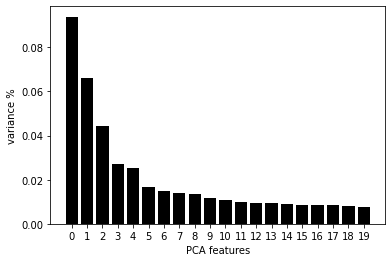

In [ ]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

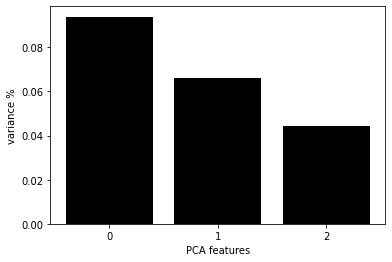

In [ ]:
from pandas.core.base import NoNewAttributesMixin
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
pca.explained_variance_ratio_

array([0.09391537, 0.06603296, 0.04418351])

Text(0, 0.5, 'PCA 2')

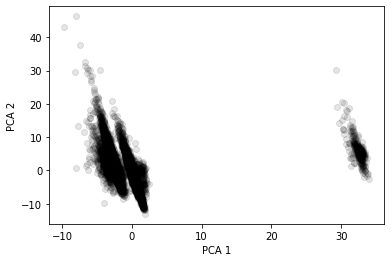

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

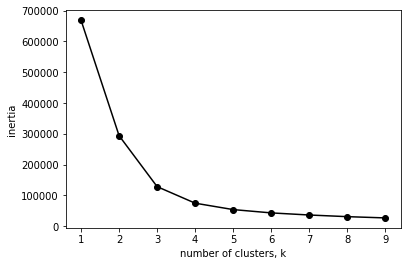

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

elbow point at k=3.

In [ ]:
model=KMeans(n_clusters=3,random_state=42,init = 'k-means++')
model.fit(PCA_components.iloc[:,:2])

KMeans(n_clusters=3, random_state=42)

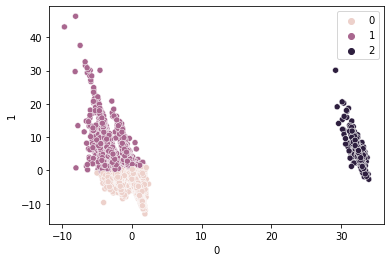

In [ ]:
sns.scatterplot(x =PCA_components.iloc[:,0] ,y =PCA_components.iloc[:,1], hue=model.labels_) 

In [ ]:
from sklearn.cluster import DBSCAN

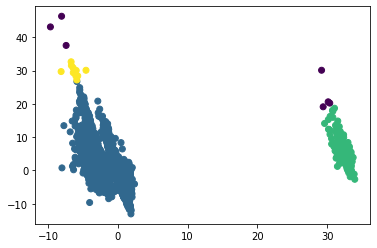

In [ ]:
clustering = DBSCAN(eps=3, min_samples=10).fit(PCA_components.iloc[:,:2])
plt.scatter(PCA_components.iloc[:,0],PCA_components.iloc[:,1],c=clustering.labels_)

In [ ]:
# Number of Clusters
labels=clustering.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)


Estimated no. of clusters: 3


In [ ]:
n_noise = list(clustering.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 7


In [ ]:
#Finding the optimal value of epsilon
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(PCA_components.iloc[:,:2])
distances, indices = nbrs.kneighbors(PCA_components.iloc[:,:2])

Text(0, 0.5, 'Distance')

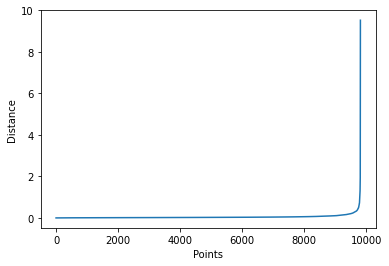

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [ ]:
#Identifying Elbow Point with Kneed Package 
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0.0919573483223191


<Figure size 360x360 with 0 Axes>

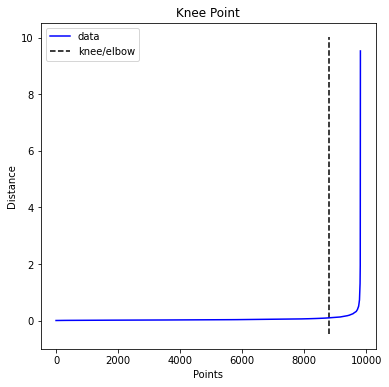

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Estimated no. of clusters: 33
Estimated no. of noise points: 3311


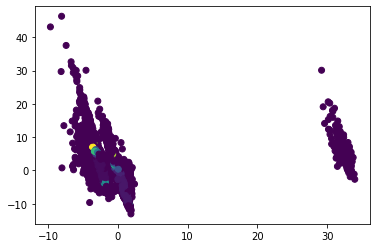

In [ ]:
clustering = DBSCAN(eps=0.0919573483223191, min_samples=10).fit(PCA_components.iloc[:,:2])
plt.scatter(PCA_components.iloc[:,0],PCA_components.iloc[:,1],c=clustering.labels_)
# Number of Clusters
labels=clustering.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)
n_noise = list(clustering.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)


here, k_means algorithm is better clustering method. as by visualising the data points  by plotting the graph we can see we are getting a distinguishable clustering in k means algorithm.